In [132]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xml.dom import minidom
from matplotlib.ticker import MultipleLocator

In [10]:
from scipy import stats

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)

In [80]:
### make mellow rainbow colormap for ebi

def make_cmap(colors, position=None, bit=False):

    if len(position) != len(colors):
        sys.exit('position length must be the same as colors')
    elif position[0] != 0 or position[-1] != 1:
        sys.exit('position must start with 0 and end with 1')
    
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):

        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

        cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)

    return cmap

##### load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/mellow-rainbow.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

##### construct the colormap

mycmap = make_cmap(color_vals,data_vals) ###this is the main rainbow colourmap to be used in the code

def reverse_colourmap(cmap, name = 'my_cmap_r'):
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r
ebicmap = reverse_colourmap(mycmap)

In [112]:
ebi = pd.read_excel('/Volumes/SAF_Data/bar-manuscript_sum22/data-interp/BI-EBI.xlsx', sheet_name='ebi-edit')
bi = pd.read_excel('/Volumes/SAF_Data/bar-manuscript_sum22/data-interp/BI-EBI.xlsx', sheet_name='bi-edit')

In [254]:
ebi_allarr = pd.read_excel('/Volumes/SAF_Data/bar-manuscript_sum22/data-interp/BI-EBI.xlsx', sheet_name='ebi-all').set_index('modelTS').to_numpy()

In [113]:
ebi_arr = ebi.set_index('modelTS').to_numpy()
bi_arr = bi.set_index('modelTS').to_numpy()

In [114]:
ebi_mapped = ebi.drop([340, 370], axis = 1)
bi_mapped = bi.drop([340, 370], axis = 1)

In [115]:
ebi_mapped = ebi_mapped.set_index('modelTS')
bi_mapped = bi_mapped.set_index('modelTS')

In [21]:
ebi_props = {'boxprops':{'facecolor':'#6b9c55', 'edgecolor':'black', 'linewidth': 1.5}, 
         'whiskerprops':{'color':'k'}, 
        'capprops':{'color':'k', 'linewidth':1.5},
        'flierprops':{'markerfacecolor':'xkcd:gray', 'marker':'o', 'markersize':2}, 
        }


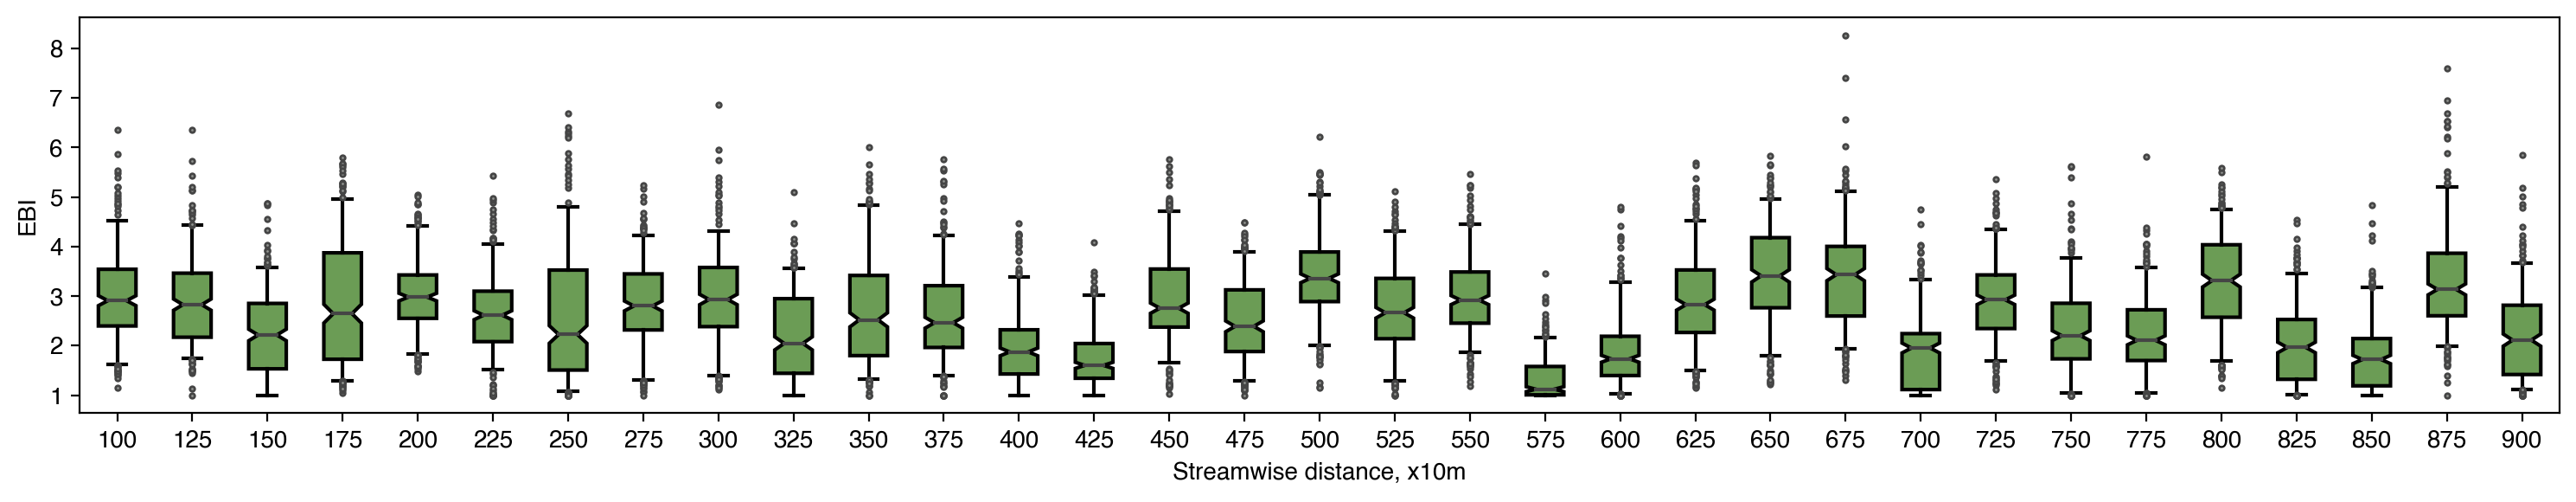

In [22]:
plt.figure(figsize = (15, 3), dpi = 200, tight_layout = True)
sns.boxplot(data = ebi_mapped, **ebi_props, showmeans = False, whis=[5, 95], width = 0.5, notch = True)#,, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
# sns.boxplot(data = bi_mapped, **ebi_props, showmeans = True, whis=[5, 95], meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
# ax = plt.gca()
# ax = ÷

plt.ylabel(f'EBI');
plt.xlabel('Streamwise distance, x10m');

In [113]:
bi_props = {'boxprops':{'facecolor':'#27791b', 'edgecolor':'black', 'linewidth': 1.5}, 
         'whiskerprops':{'color':'k'}, 
        'capprops':{'color':'k', 'linewidth':1.5},
        'flierprops':{'markerfacecolor':'xkcd:gray', 'marker':'o', 'markersize':2}, 
        }


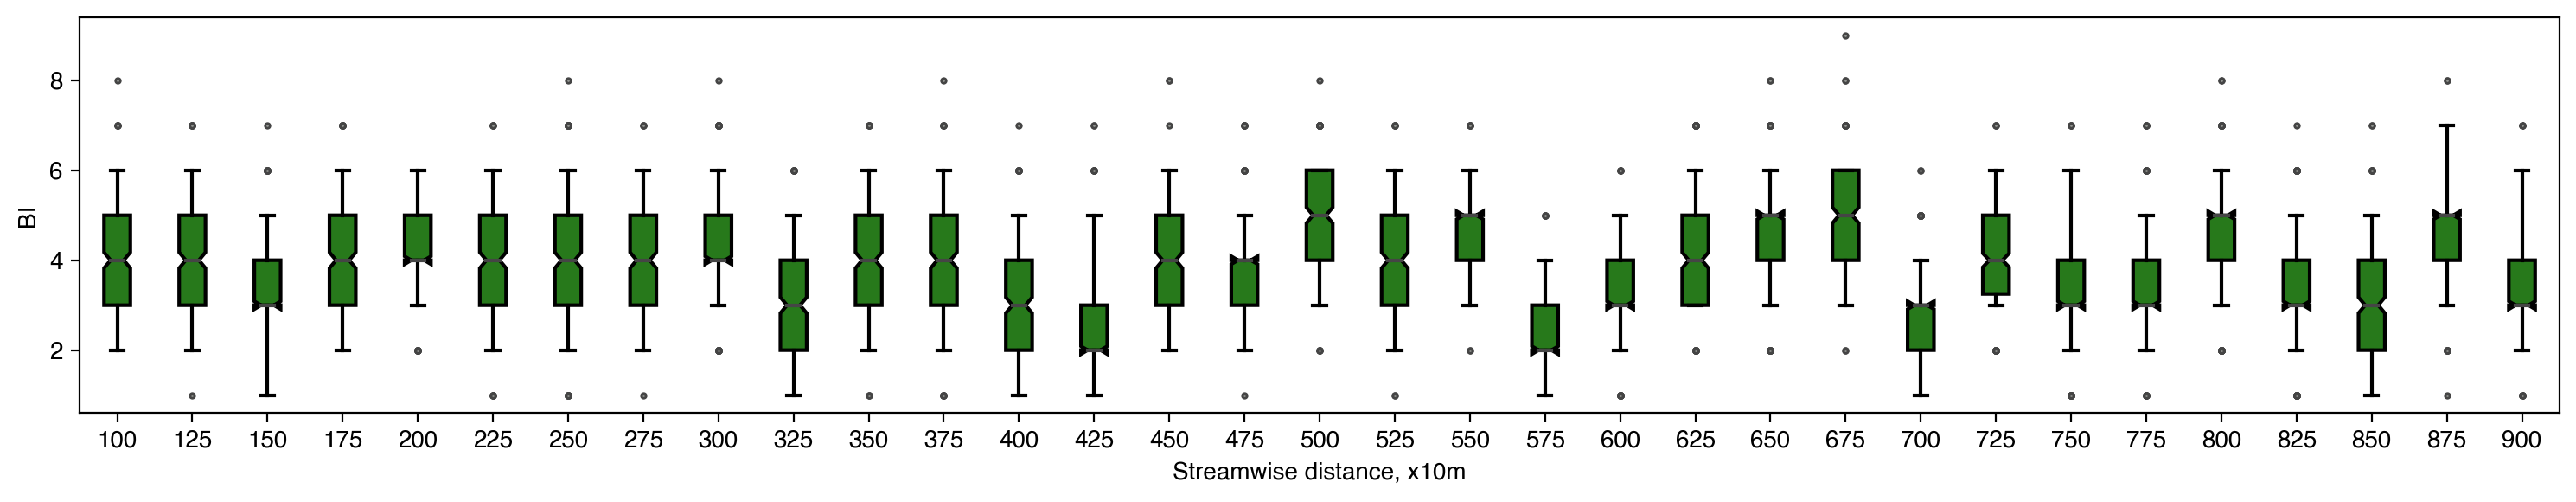

In [115]:
plt.figure(figsize = (15, 3), dpi = 200, tight_layout = True)
sns.boxplot(data = bi_mapped, **bi_props, showmeans = False, whis=[5, 95], width = 0.35, notch = True)#,, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
# sns.boxplot(data = bi_mapped, **ebi_props, showmeans = True, whis=[5, 95], meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
# ax = plt.gca()
# ax = ÷

plt.ylabel(f'BI');
plt.xlabel('Streamwise distance, x10m');

In [297]:
widths = np.load('/Volumes/SAF_Data/NAYS2DH_files/Data/chan-widths/CW-0hfld-datamaster-2hour-flux.npy', allow_pickle = True) ## channel margins
print(f'shape = {widths.shape}')

shape = (1001, 7, 382)


In [298]:
widths[:, 3, :] = widths[:, 2, :]-widths[:, 1, :] ## widths of the channel
widths[:, 4, 1:] = abs(widths[:, 1, 1:])-abs(widths[:, 1, :-1]) # right bank displacement
widths[:, 5, 1:] = abs(widths[:, 2, 1:])-abs(widths[:, 2, :-1]) # left bank displacement
widths[:, 6, 1:] = widths[:, 3, 1:] - widths[:, 3, :-1] ## change in width through time

In [299]:
widening_rates = widths[:, 6, :].T
widening_rates = np.delete(widening_rates, (33+65), axis = 0)#, :] = np.nan
print(widening_rates.shape)

(381, 1001)


In [300]:
section_sampling = 25
secstart = 100
secend = 900
adjustment_time = 65
seclist = np.arange(secstart, secend+1, section_sampling)
seclist_ebi = np.arange(secstart, secend+1)
wr_plots = pd.DataFrame(widening_rates[adjustment_time:, seclist], columns = seclist)
wr_plots_check = pd.DataFrame(widening_rates[adjustment_time:, seclist_ebi], columns = seclist_ebi)

In [301]:
wr_plots_check.shape
wr_plots_check_arr = wr_plots_check.to_numpy()

In [302]:
wr_plots_check.shape

(316, 801)

In [303]:
wr_props = {'boxprops':{'facecolor':'None', 'edgecolor':'black', 'linewidth': 1.5}, 
         'whiskerprops':{'color':'k'}, 
        'capprops':{'color':'k', 'linewidth':1.5},
        'flierprops':{'markerfacecolor':'xkcd:gray', 'marker':'o', 'markersize':2}, 
        }

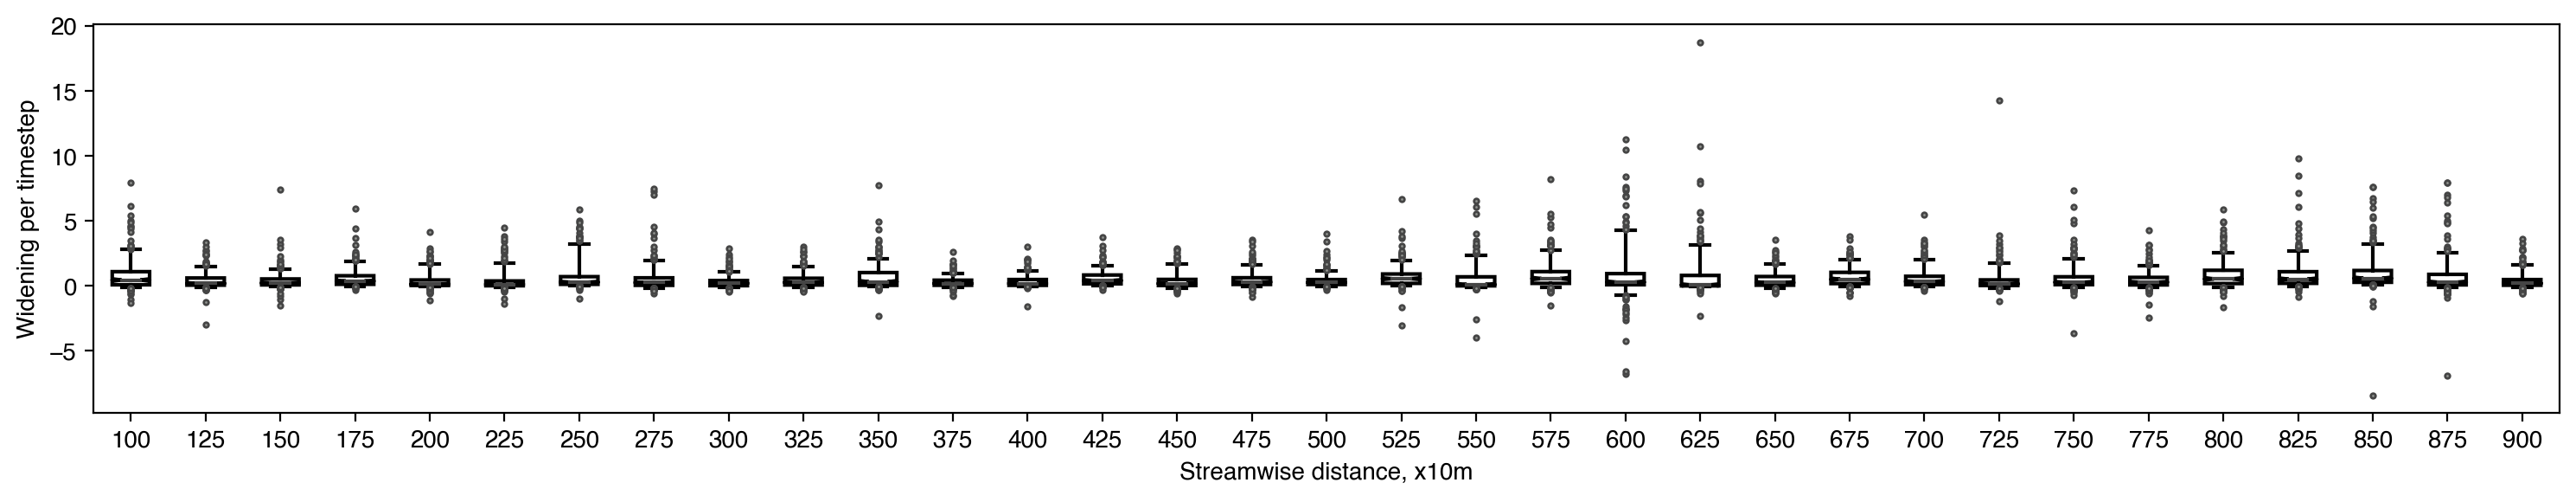

In [304]:
plt.figure(figsize = (15, 3), dpi = 200, tight_layout = True)
sns.boxplot(data = wr_plots, **wr_props, showmeans = False, whis=[5, 95], width = 0.5, showfliers = True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"}, notch = True)
# sns.boxplot(data = bi_mapped, **ebi_props, showmeans = True, whis=[5, 95], meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
# ax = plt.gca()
# ax = ÷

plt.ylabel(f'Widening per timestep');
plt.xlabel('Streamwise distance, x10m');
# plt.ylim(-1, 15)

<AxesSubplot:>

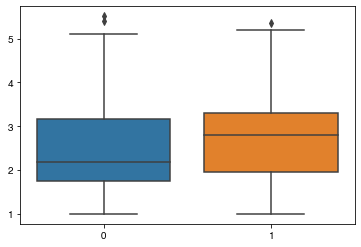

In [305]:
sns.boxplot(data = (ebi[340], ebi[370]))

In [306]:
adjustment_time = 65

In [6]:
path = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/fullbed-interp/'
# ylocs = np.load(f'{path}ypos.npy', allow_pickle = True)
# xlocs = np.load(f'{path}xpos.npy', allow_pickle = True)
bedz = np.load(f'{path}bed_elevation.npy', allow_pickle = True)
thickness = bedz[:, :, 1:]-bedz[:, :, :-1]
bedz = bedz[:, :, adjustment_time:]

In [7]:
meanthick = np.nanmean(thickness, axis = 0).T
meanthick.shape

(381, 1001)

(array([2.70515e+05, 8.91100e+04, 1.70590e+04, 3.60500e+03, 8.14000e+02,
        2.01000e+02, 5.50000e+01, 1.60000e+01, 4.00000e+00, 2.00000e+00]),
 array([0.        , 0.51099116, 1.02198232, 1.53297349, 2.04396465,
        2.55495581, 3.06594697, 3.57693814, 4.0879293 , 4.59892046,
        5.10991162]),
 <BarContainer object of 10 artists>)

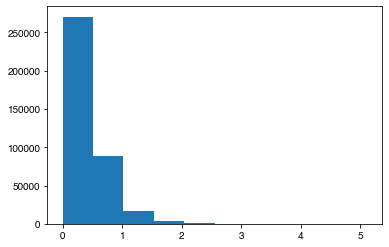

In [41]:
plt.hist(abs(np.nanmax(thickness, axis = 0)).ravel())

(65.0, 381.0)

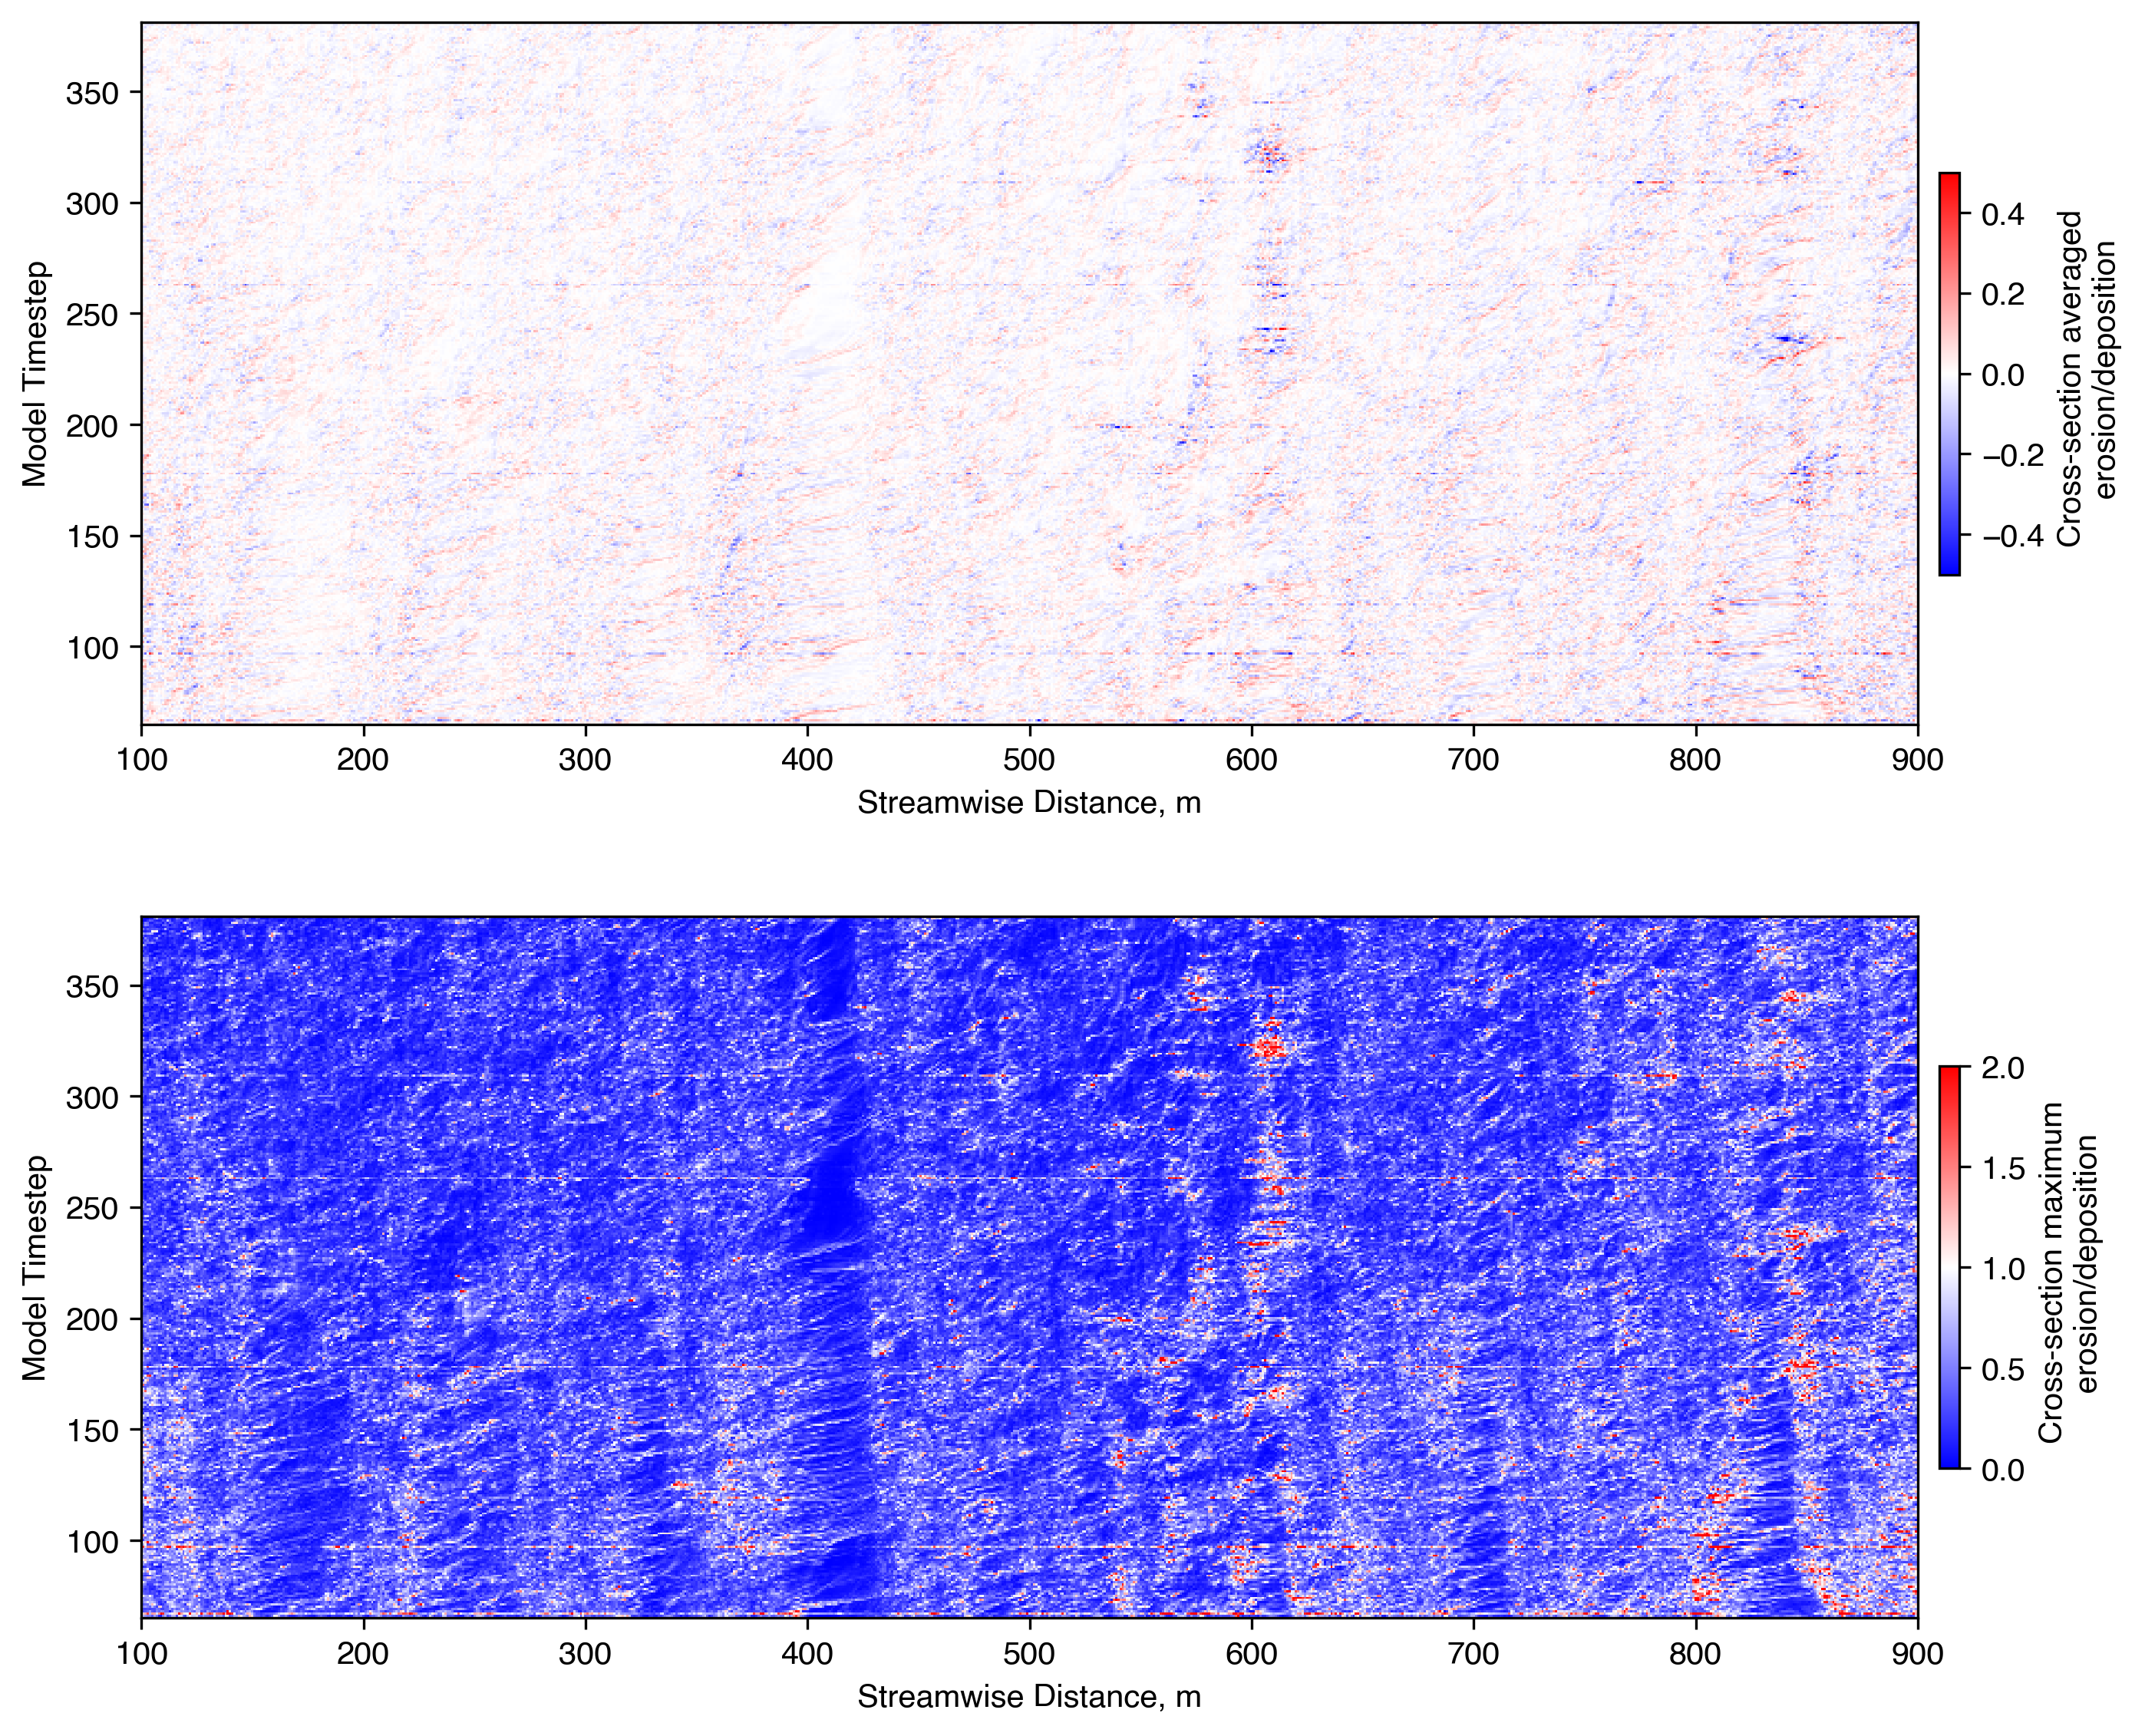

In [307]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8), dpi = 300, tight_layout = True)
rows, cols = meanthick.shape
means = ax[0].imshow(meanthick, interpolation = 'none',
                 cmap='bwr', vmin = -0.5, vmax = 0.5 )
fig.colorbar(means, label = 'Cross-section averaged \n erosion/deposition', shrink = 0.5, ax = ax[0], aspect = 20, pad = 0.01)
ax[0].set_xlabel('Streamwise Distance, m')
ax[0].set_ylabel('Model Timestep')
ax[0].set_xlim(100, 900)
ax[0].set_ylim(65, 381)

maxs = ax[1].imshow(abs(np.nanmax(thickness, axis = 0)).T, 
                    interpolation = 'none', cmap='bwr', vmin = 0, vmax = 2)

fig.colorbar(maxs, label = 'Cross-section maximum \n erosion/deposition', shrink = 0.5, ax = ax[1], aspect = 20, pad = 0.01)
ax[1].set_xlabel('Streamwise Distance, m')
ax[1].set_ylabel('Model Timestep')
ax[1].set_xlim(100, 900)
ax[1].set_ylim(65, 381)


In [308]:
np.nanmin(wr_plots_check_arr[:50, 0])

-1.0074682819999907

In [309]:
np.where(wr_plots_check_arr[:50, 0]==np.nanmin(wr_plots_check_arr[:50, 0]))

(array([3]),)

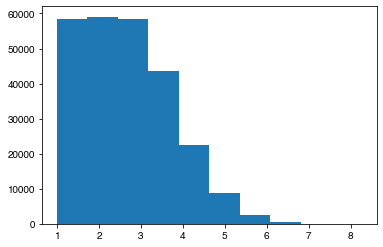

In [310]:
plt.hist(ebi_allarr.ravel());
# plt.hist(wr_plots_check_arr.ravel(), histtype = 'step');

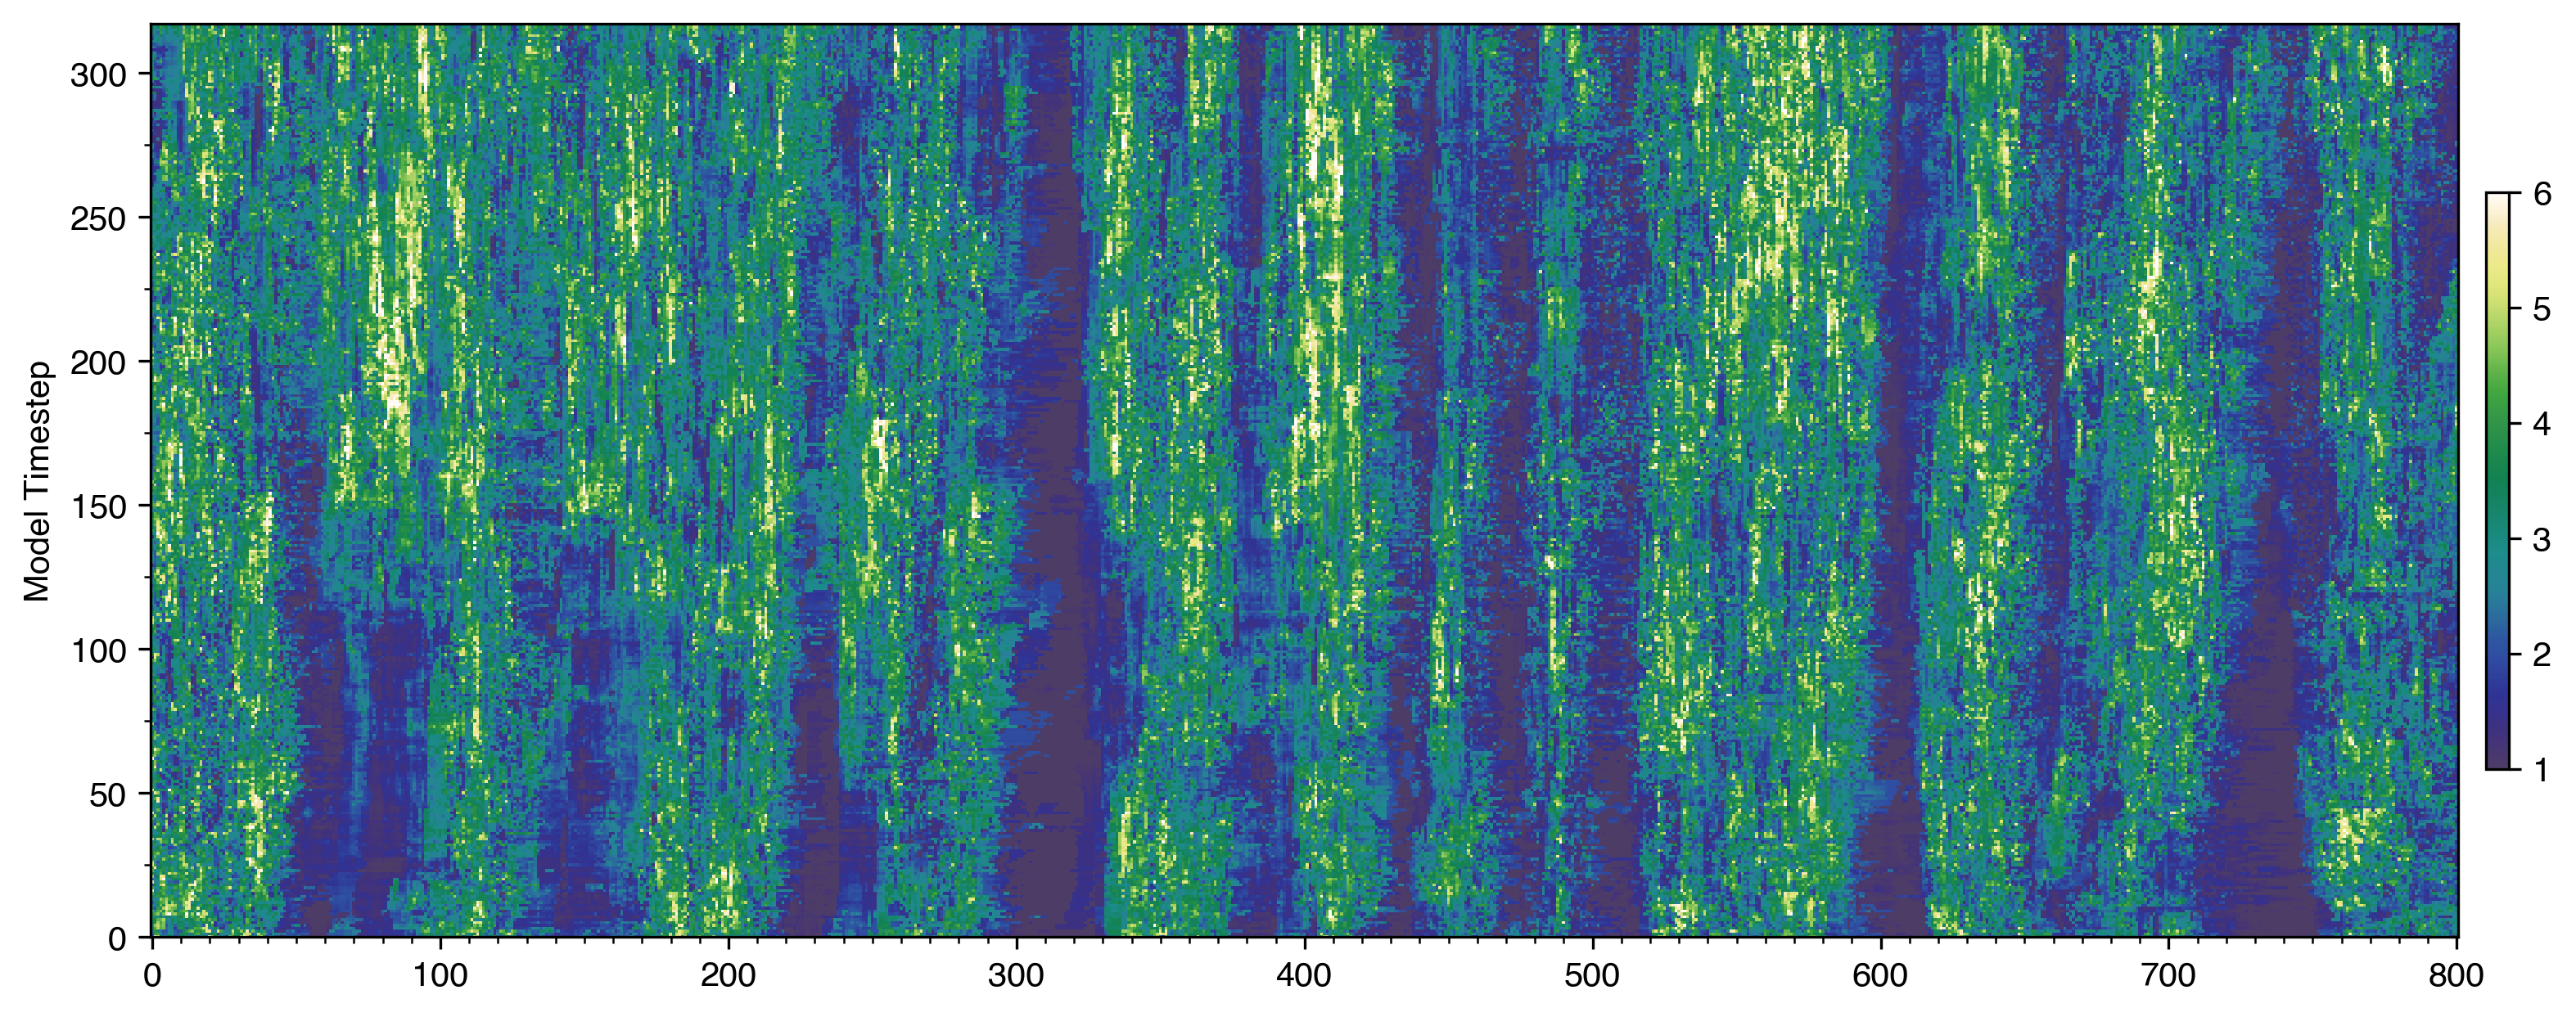

In [326]:
fig, ax = plt.subplots(1, 1, figsize = (12, 5), dpi = 300, tight_layout = True, sharex = True, sharey = True)
ebiplot = ax.imshow(ebi_allarr, interpolation = 'none', vmin = 1, vmax = 6, aspect = 'equal', cmap = ebicmap)
# biplot = ax[1].imshow(wr_plots_check_arr, interpolation = 'none', vmin = -7.5, vmax = 7.5, aspect = 'equal', cmap = 'bwr_r')
ax.set_ylim(0, 317)
# ax[0].set_xlim(0, 31)
# ax[0].set_xlim(0, 34)


ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(25))

plt.colorbar(ebiplot, pad = 0.01, aspect = 25, ax = ax, shrink = .5)
# plt.colorbar(biplot, pad = 0.01, aspect = 10, ax = ax[1], shrink = 0.5)

# ax[0].set_xlabel('Streamwise Distance')
# ax[1].set_xlabel('Streamwise Distance')

ax.set_ylabel('Model Timestep')
# ax[1].set_yabel('Model Timestep')

# plt.savefig('/Users/safiya/Desktop/BarManuscript_2022-local/figs/python-results/ebi-all-timeseries.png')

In [336]:
ebi_allarr[:, 239].reshape(len(ebi_allarr), 1)

array([[2.70246 ],
       [2.794152],
       [1.89374 ],
       [2.559692],
       [1.820583],
       [1.870309],
       [2.700451],
       [1.793484],
       [1.870417],
       [1.908074],
       [1.866281],
       [1.633507],
       [1.632265],
       [1.782172],
       [1.67864 ],
       [1.824703],
       [1.658453],
       [1.67296 ],
       [1.531328],
       [1.495032],
       [1.495652],
       [1.632141],
       [1.469247],
       [1.367833],
       [1.396379],
       [1.410482],
       [1.684787],
       [1.115155],
       [1.564851],
       [1.582727],
       [1.605217],
       [1.624542],
       [1.620308],
       [1.17851 ],
       [1.12951 ],
       [1.14964 ],
       [1.418399],
       [1.187122],
       [1.669232],
       [1.574678],
       [1.131775],
       [1.61337 ],
       [1.611029],
       [1.      ],
       [1.627215],
       [1.      ],
       [1.492321],
       [1.374412],
       [1.384868],
       [1.371067],
       [1.399261],
       [1.598561],
       [1.64

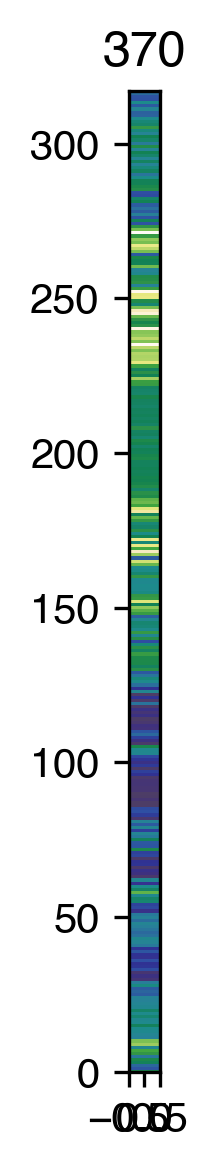

In [378]:
plt.figure(figsize = (3, 4), dpi = 300, tight_layout = True)
plt.imshow(ebi_allarr[:, 269:270], interpolation = 'none', cmap = ebicmap, aspect = '0.1')
plt.ylim(0, 317)
plt.title('370')

# plt.savefig('/Users/safiya/Desktop/BarManuscript_2022-local/figs/python-results/ebi-370-barcode.png')

Text(0.5, 1.0, 'Drift in mean ebi through time')

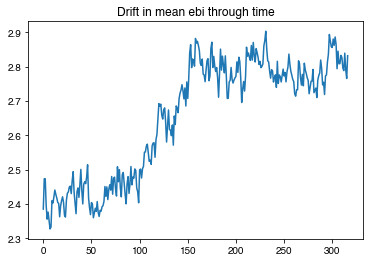

In [327]:
plt.plot(np.nanmean(ebi_allarr, axis = 1))
plt.title('Drift in mean ebi through time')

Text(0, 0.5, 'Model Timestep')

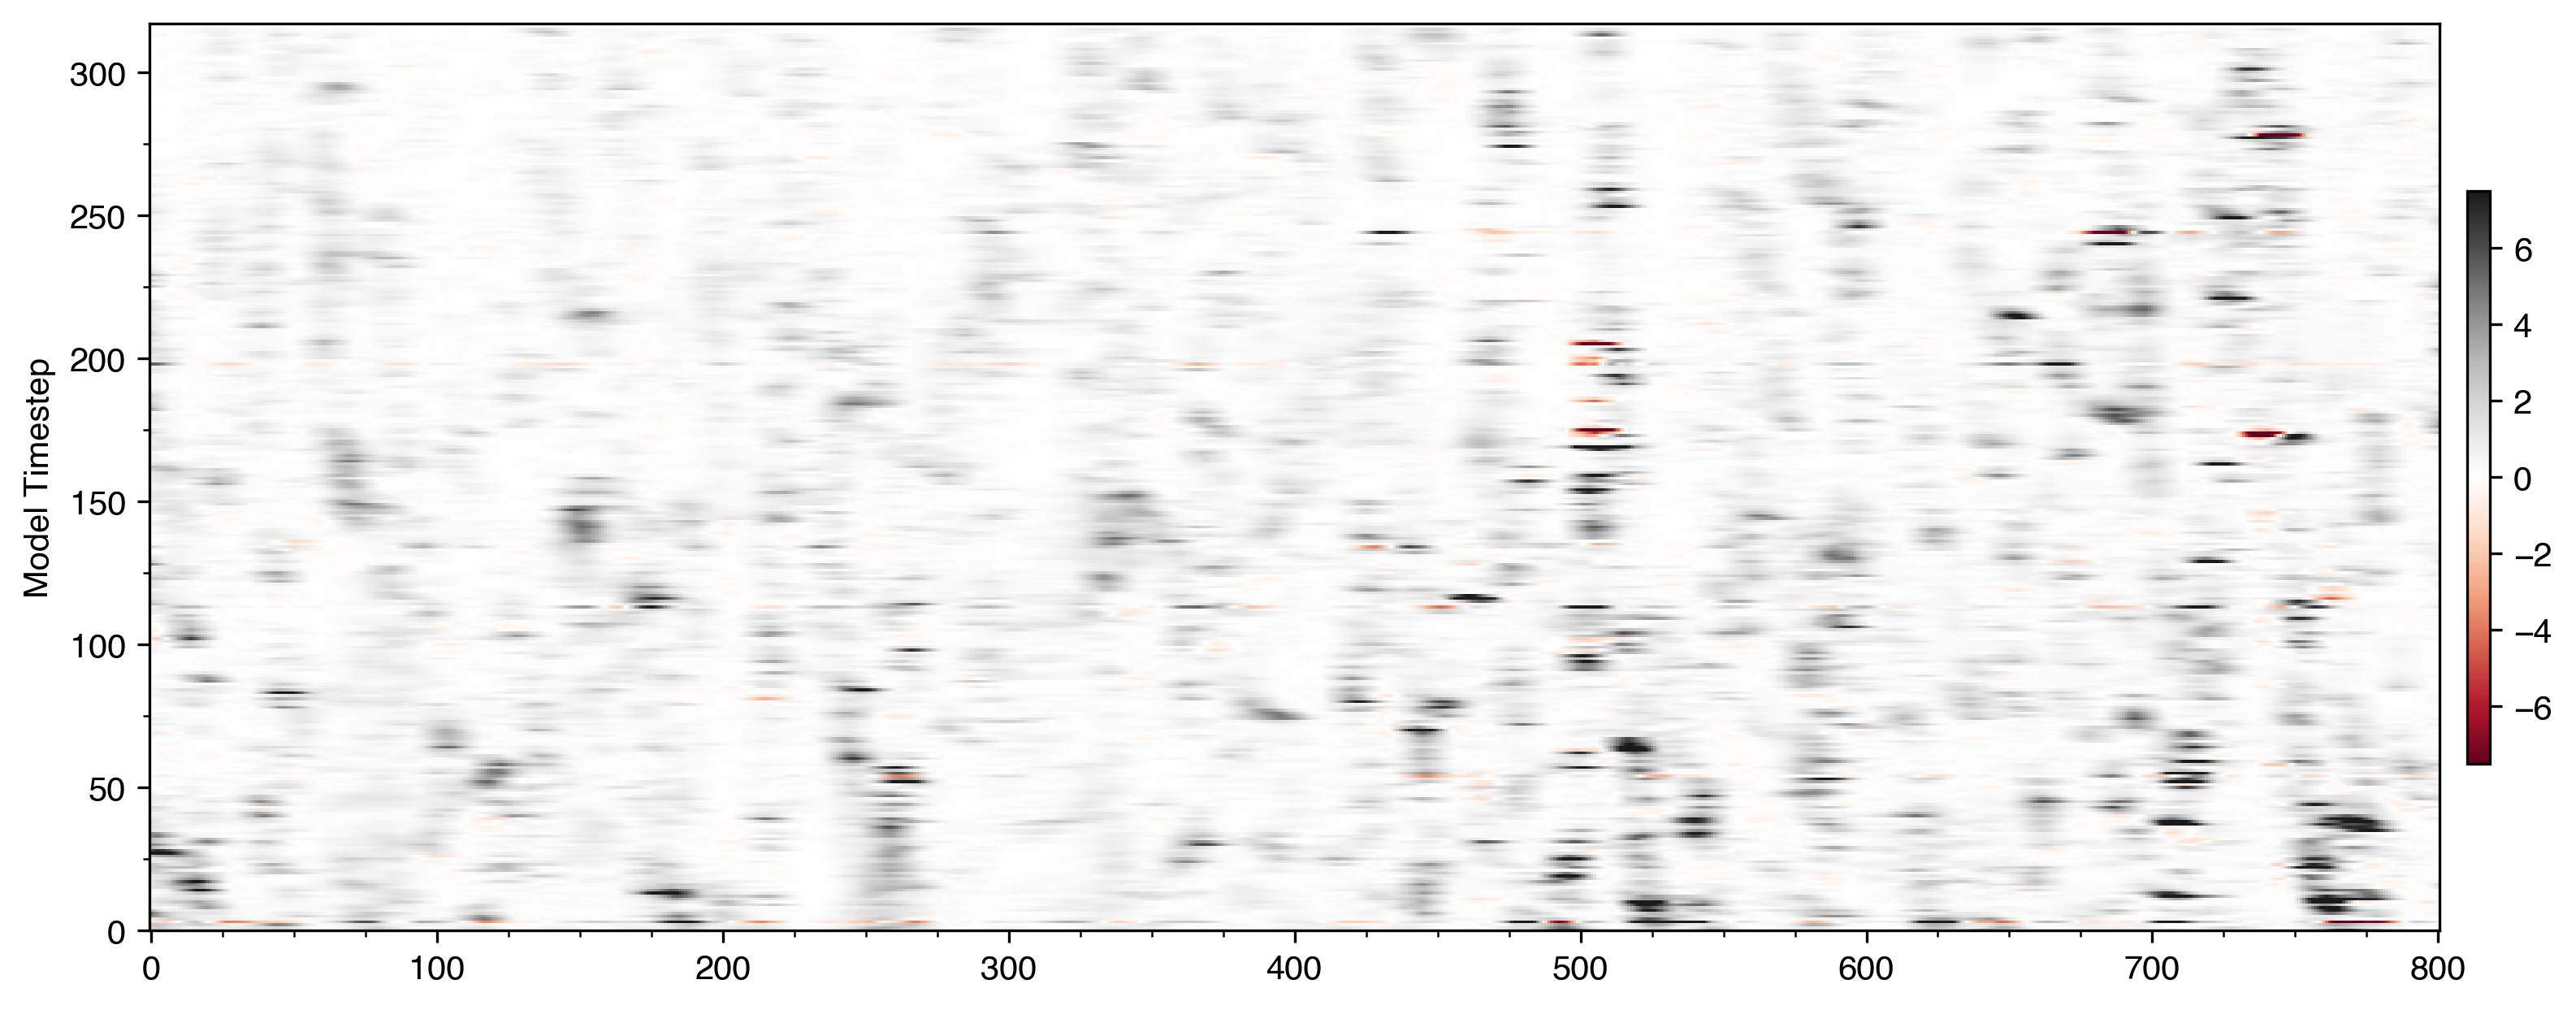

In [316]:
fig, ax = plt.subplots(1, 1, figsize = (12, 5), dpi = 300, tight_layout = True, sharex = True, sharey = True)
ebiplot = ax.imshow(wr_plots_check_arr, interpolation = 'none', vmin = -7.5, vmax = 7.5, aspect = 'equal', cmap = 'RdGy')
# biplot = ax[1].imshow(wr_plots_check_arr, interpolation = 'none', vmin = -7.5, vmax = 7.5, aspect = 'equal', cmap = 'bwr_r')
ax.set_ylim(0, 317)
# ax[0].set_xlim(0, 31)
# ax[0].set_xlim(0, 34)


ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(25))

plt.colorbar(ebiplot, pad = 0.01, aspect = 25, ax = ax, shrink = .5)
# plt.colorbar(biplot, pad = 0.01, aspect = 10, ax = ax[1], shrink = 0.5)

# ax[0].set_xlabel('Streamwise Distance')
# ax[1].set_xlabel('Streamwise Distance')

ax.set_ylabel('Model Timestep')
# ax[1].set_yabel('Model Timestep')

# plt.savefig('/Users/safiya/Desktop/BarManuscript_2022-local/figs/python-results/ebi-all-timeseries.png')

In [313]:
bedz_pres = bedz[:, 340, 1:]-bedz[:, 340, :-1] ## bed elevation events at 340
bedz_trunc = bedz[:, 370, 1:]-bedz[:, 370, :-1] ## bed elevation events at 370

print(bedz_pres.shape)

(705, 316)


Text(0, 0.5, 'CV of erosion/deposition')

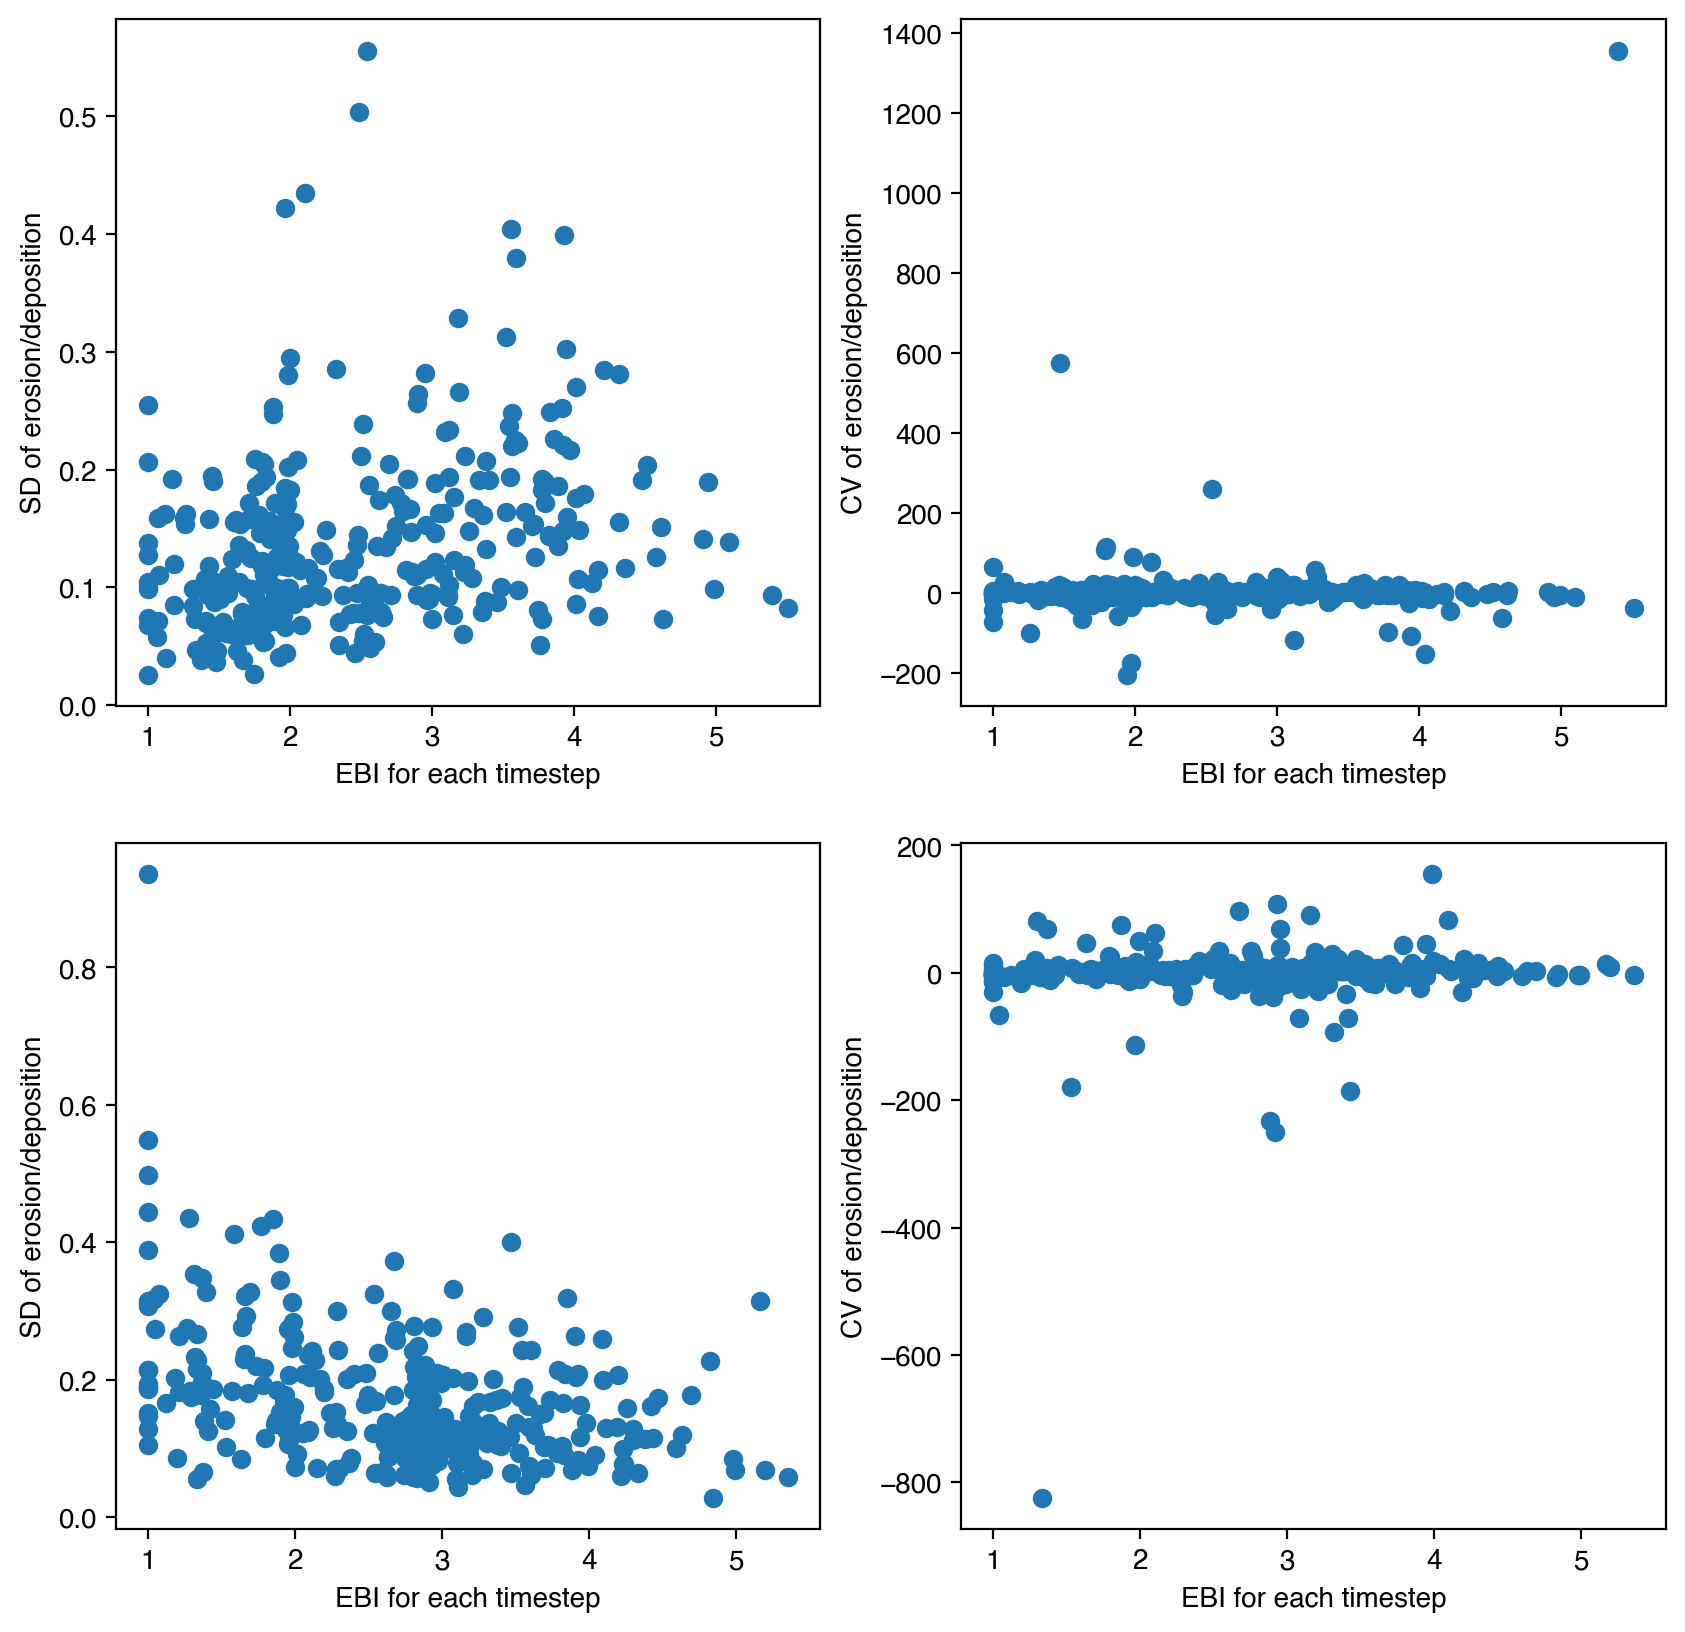

In [209]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), dpi = 200)

ax[0, 0].scatter(ebi[340][1:-1], np.nanstd(bedz_pres, axis=0))
ax[1, 0].scatter(ebi[340][1:-1], stats.variation(bedz_pres, axis = 0, nan_policy = 'omit'))


ax[1, 0].scatter(ebi[370][1:-1], np.nanstd(bedz_trunc, axis=0))
ax[1, 1].scatter(ebi[370][1:-1], stats.variation(bedz_trunc, axis = 0, nan_policy = 'omit'))

ax[0, 0].set_xlabel('EBI for each timestep')
ax[1, 0].set_xlabel('EBI for each timestep')
ax[0, 1].set_xlabel('EBI for each timestep')
ax[1, 1].set_xlabel('EBI for each timestep')

ax[0, 0].set_ylabel('SD of erosion/deposition')
ax[1, 0].set_ylabel('SD of erosion/deposition')
ax[0, 1].set_ylabel('CV of erosion/deposition')
ax[1, 1].set_ylabel('CV of erosion/deposition')

In [251]:
toohigh = np.where(abs(stats.variation(bedz_pres, axis = 0, nan_policy = 'omit'))>20)

In [252]:
np.nanmean(bedz_pres, axis = 0)[toohigh]

array([-2.56945126e-03, -9.89599561e-03,  7.51336750e-04, -7.07839337e-04,
        4.09806775e-03,  2.57807074e-03,  2.49285095e-03,  5.97381155e-03,
       -3.90661602e-03,  4.31840718e-03,  9.14734147e-03, -6.42919011e-03,
       -1.96867691e-03, -2.23680221e-03,  6.89668465e-05, -2.00757282e-03,
       -9.83477573e-04,  5.48851901e-03, -1.59889571e-02,  1.08816726e-02,
        2.00293166e-02, -2.85161337e-03,  4.34985474e-03, -3.63668741e-03,
        1.77969438e-03, -8.65975506e-04,  2.72930349e-03,  4.72167754e-03,
       -4.69560999e-03,  3.21410108e-03, -2.43145861e-03, -6.09738421e-03,
        1.65062291e-03, -6.75358139e-04,  5.70126945e-03,  6.19074641e-03,
        1.81269714e-03,  3.17808766e-03, -4.92005663e-03, -2.04912652e-03,
       -9.16316310e-04,  2.13314334e-03,  3.96353025e-04, -3.60210735e-03,
       -3.55588089e-03, -2.97079865e-03, -1.55596789e-03, -3.41673841e-03,
        1.81651348e-04, -2.14972886e-03,  1.09924294e-03,  3.20306860e-03,
        3.09036792e-03])

In [253]:
np.nanstd(bedz_pres, axis = 0)[toohigh]

array([0.14398974, 0.20861021, 0.08034185, 0.04625215, 0.08720919,
       0.14793055, 0.05123708, 0.16610153, 0.15267948, 0.09142704,
       0.22267539, 0.28427977, 0.19170379, 0.08267395, 0.09351502,
       0.12546183, 0.14863801, 0.43440594, 0.39929092, 0.2259575 ,
       0.40382361, 0.30210571, 0.0935264 , 0.07878254, 0.07282234,
       0.10203638, 0.10755862, 0.14627382, 0.16612141, 0.10803934,
       0.42231467, 0.17090175, 0.18902481, 0.13729232, 0.15884574,
       0.14630413, 0.04048326, 0.08708075, 0.10204192, 0.07937559,
       0.04875216, 0.55567382, 0.02593786, 0.08140239, 0.25455936,
       0.12741095, 0.15383587, 0.09909958, 0.10444074, 0.06493043,
       0.09918017, 0.07480565, 0.07838613])

Text(0, 0.5, 'Kernel density')

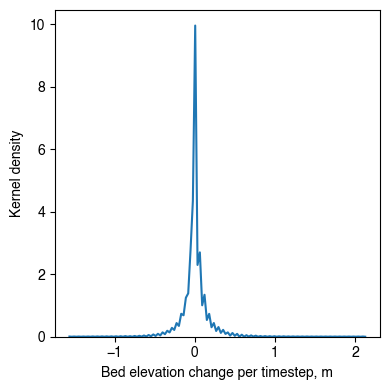

In [264]:
plt.figure(figsize = (4, 4), dpi = 100, tight_layout = True)

sns.kdeplot(data = bedz_pres[~np.isnan(bedz_pres)].ravel())

plt.xlabel('Bed elevation change per timestep, m')
plt.ylabel('Kernel density')

In [271]:
plt.hist(np.nanmean(wr_plots, axis = ))

100        125       150       175       200       225       250  \
0        NaN        NaN       NaN       NaN       NaN       NaN       NaN   
1   6.309230   6.276122  6.310218  6.333068  6.334867  6.330428  6.327265   
2   3.306425   3.927835  3.055195  2.600687  2.651550  2.309587  1.821879   
3   2.243101   4.174697  2.178508  3.256705  3.248209  2.623094  3.933902   
4   3.581207   7.289909  2.006515  2.915761  3.606649  3.153112  3.729814   
5   4.268649   5.097346  0.432643  0.929969  2.057741  4.994233  3.865006   
6   3.980829   4.365445  0.319458  0.703216  1.771562  8.196559  3.519467   
7   2.807891   1.305975  0.564560  0.213785  1.931368  8.354623  3.032369   
8   3.288653   4.161892  0.558675  0.092173  6.120084  4.026188  7.973747   
9   5.060231   2.226261  1.551370  1.123389  4.907721  2.871317  3.965080   
10  2.910818   3.694983  0.315429  1.120046  2.359329  4.242994  1.154513   
11  2.654258   3.159086  0.751853  0.917262  2.520691  9.037236  1.152395   
12  3.154431   4.389126  3.180846  0.627840  3.219426  6.812957  0.933474   
13  2.289880  12.021182  1.166409  1.189551  5.425158  5.086744  0.992783   
14  3.193552   6.246094  1.534530  0.230316  6.199955  6.411011  0.962242   
15  2.887429   4.569694  0.676295  0.237933  6.369082  0.996646  1.082826   
16  1.208660   6.741128  1.314994  0.728647  8.789819  5.540240 -0.439475   
17  2.968732   5.443264  0.942979  0.810368  9.041852  3.195554  0.282977   
18  3.049682   3.221624  1.502411  1.095345  9.874538  2.640482  2.084975   
19  5.021330   2.812318 -0.007173  0.927580  3.046758  2.044305  1.984761   
20  2.008691   4.252628  0.476287  1.122181  3.720324  1.407348  1.530137   
21  1.476577   2.238181  1.075818  0.448656  5.224845  1.367843  0.942180   
22  1.937935   0.211444  0.433139  0.214624  5.159168  2.471955  0.250873   
23  1.107318   0.785584  1.245858  0.055624  4.926184  2.206741  0.429909   
24  1.053773   0.241259  1.112961  0.023168  2.086559  0.918254  1.240065   
25  1.246347   3.728762  0.589525  1.465437  2.013088  0.660499  1.915304   
26  2.706003   4.101406  1.820234  2.513628  3.423614  0.481234  1.845659   
27  1.637696   4.016202  0.987771  1.192116  5.379200  0.377839  1.258941   
28  1.305467   2.294456  1.226053  0.339325  2.971621  0.948517  0.864685   
29  1.053282   4.947805  1.126500  0.167636  2.869263  1.267745  0.670768   
30  2.065451   3.054402  0.681527  0.006279  3.835064  0.565488  1.077615   
31  1.745250   1.679281  0.739063 -0.036601  5.151862  0.474850  1.016256   
32  1.044784   3.018746  0.084099  0.026882  3.119601  0.271121  0.583764   
33  1.713857   3.887538  0.599049  0.058914  2.810774  0.207231  0.160349   
34  1.250259   1.636958  0.705060  0.158805  2.210734 -0.638324  0.556941   
35  0.876107   2.373966  0.853231  0.221339  1.209052  0.011467  0.736497   
36  1.960669   2.934440  0.905691  0.153502  2.582948  0.503075  0.364387   
37  1.607070   1.816611  0.830883  0.181178  1.766209  2.380008  0.125074   
38  1.092899   0.927105  0.757673  0.507481  1.674649  2.830995  0.143945   
39  1.176367   0.142165  0.354855  0.499549  0.568425  1.654791  0.617869   
40  1.149372   0.682966  0.444421  0.572485  0.562003  1.321443  0.837547   
41  1.000696   0.228027  1.679639  0.281677  0.673167  0.811154  0.535328   
42  1.236283   0.416535  1.191958  0.355197  0.265356  0.477684  0.079319   
43  2.005409   0.418241  1.286726  1.301580  0.261806  0.364332  1.455992   
44  3.241722   0.408901  0.448900  0.796783  0.359158 -0.048743  1.125175   
45  2.533640   3.216011  0.202576  1.155359  0.129857  0.884441  0.399232   
46  1.938067   3.458906  0.499472  0.790026  0.119898  1.426842  0.478227   
47  0.914287   2.243440  0.180846  0.592615  0.264852 -0.109989  1.310810   
48 -0.049722   0.609646  0.151458  0.569189  0.101538  0.061692  1.192119   
49  1.037461   0.449868  0.123379  0.811392  0.124903  0.309151  1.074760   
50  0.305652   0.823191  0.310613  0.585726  0.171036  1.025846  1.041695   
51  0

In [7]:
bed_elevation = np.load(f'{path}bed_elevation.npy', allow_pickle = True) ## load all bed elevation data to make the bed elevation CV plot

In [8]:
ztest = bed_elevation.reshape(-1, bed_elevation.shape[2])

In [15]:
zmean = np.nanmean(ztest, axis = 0)


(382,)


In [16]:
zstd = np.nanstd(ztest, axis = 0)

In [19]:
zcv = np.divide(zstd, zmean)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


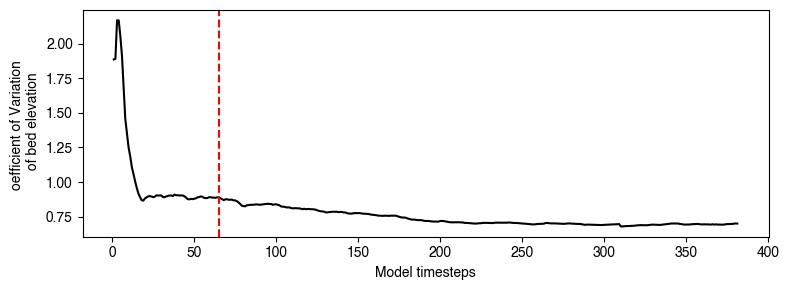

In [20]:
plt.figure(figsize = (8, 3), dpi = 100, tight_layout = True)
plt.plot(zcv, c = 'k')
plt.xlabel('Model timesteps')
plt.ylabel('oefficient of Variation \n of bed elevation')

plt.axvline(x = 65, c = 'r', ls = '--')

In [12]:
ztest.shape

(705705, 382)